       Temperature  Pressure  Catalyst Concentration   Feed Rate  \
0       282.203033  2.068730                1.115207   55.037883   
1       386.425356  3.225476                1.237748  179.169294   
2       372.585306  1.495215                0.692463  186.953315   
3       385.582071  3.743355                1.950087   93.122991   
4       356.031890  3.249018                0.691933  106.746659   
...            ...       ...                     ...         ...   
49995   385.319650  4.475825                0.975767  173.997553   
49996   256.264783  2.224827                1.543586  134.157310   
49997   309.432898  1.519587                1.901872  160.684454   
49998   369.794467  4.061323                1.313738   53.738175   
49999   323.664731  3.351822                1.389579   94.285868   

       Reaction Time  Product Yield  
0          32.028917     189.161455  
1          65.616087     267.924360  
2          89.645770     232.810533  
3          60.212331     251.11

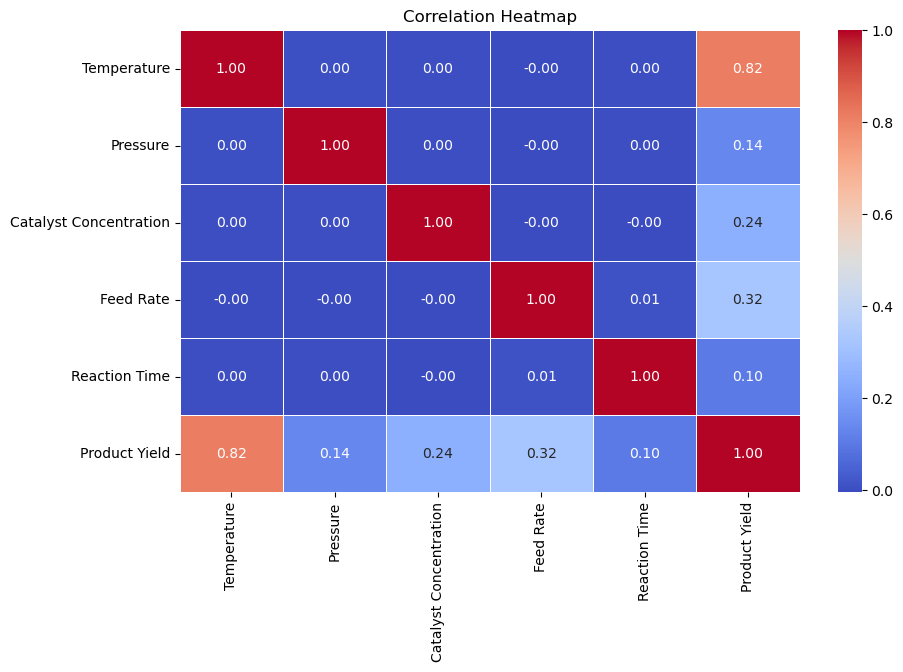

Mean Absolute Error (MAE): 8.44
Mean Squared Error (MSE): 111.84
R-squared (R2): 0.84


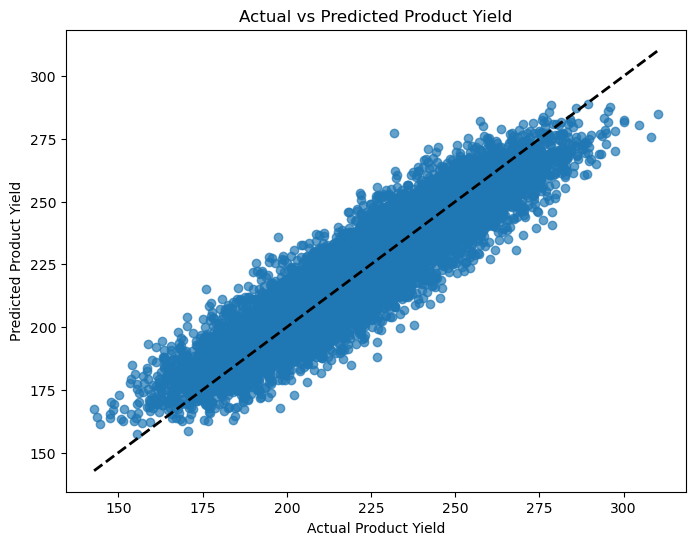

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(96)

# Generate synthetic data for the chemical process
n_samples = 50000

# Randomly generate data for features
temperature = np.random.uniform(250, 400, n_samples)  # Temperature between 250°C and 400°C
pressure = np.random.uniform(1, 5, n_samples)         # Pressure between 1 atm and 5 atm
catalyst_concentration = np.random.uniform(0.5, 2.0, n_samples)  # Catalyst concentration between 0.5% and 2%
feed_rate = np.random.uniform(50, 200, n_samples)     # Feed rate between 50 kg/hr and 200 kg/hr
reaction_time = np.random.uniform(30, 120, n_samples)  # Reaction time between 30 min and 120 min

# Simulate product yield (target variable)
product_yield = (
    0.5 * temperature + 
    3.0 * pressure + 
    15.0 * catalyst_concentration + 
    0.2 * feed_rate + 
    0.1 * reaction_time +
    np.random.normal(0, 10, n_samples)  # Add some noise
)

# Create a DataFrame
df = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure,
    'Catalyst Concentration': catalyst_concentration,
    'Feed Rate': feed_rate,
    'Reaction Time': reaction_time,
    'Product Yield': product_yield
})

# Display the first few rows of the dataset
print(df)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and test sets
X = df.drop('Product Yield', axis=1)
y = df['Product Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Visualize the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.69)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Product Yield')
plt.ylabel('Predicted Product Yield')
plt.title('Actual vs Predicted Product Yield')
plt.show()





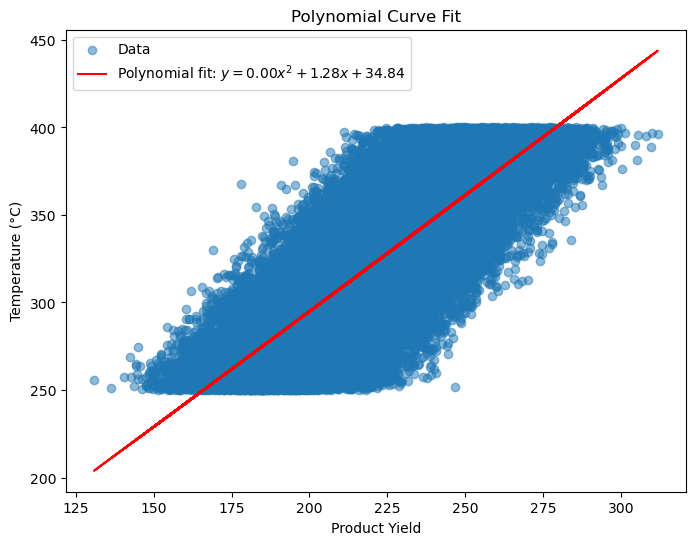

In [13]:
u=df['Product Yield']
v=df['Temperature']
s=u.head()
t=v.head()

# Fit polynomial model to predict Temperature from Product Yield
coefficients = np.polyfit(u,v, 2) 
a2, a1, a0 = coefficients
# Generate predictions
z=df['Temperature_pred'] = a2 * u**2 + a1 * u + a0

# Plot the original data and the fitted polynomial curve
plt.figure(figsize=(8, 6))
plt.scatter(u,v, label='Data', alpha=0.5)
plt.plot(u,z, color='red', label=f'Polynomial fit: $y = {a2:.2f}x^2+ {a1:.2f}x + {a0:.2f}$')
plt.legend()
plt.xlabel('Product Yield')
plt.ylabel('Temperature (°C)')
plt.title('Polynomial Curve Fit')
plt.show()
